In [1]:
# Load packages
import sys
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 #high res figures
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import xgboost as xgb
import shap
import pickle

mpl.rcParams['figure.dpi'] = 400

In [2]:
with open('../../Data/xgb_model_w_data.pkl', 'rb') as f:
    features_response, X_train_all, y_train_all, X_test_all,\
    y_test_all, xgb_model_4 = pickle.load(f)

In [3]:
test_set_pred_proba = xgb_model_4.predict_proba(X_test_all)[:,1]

In [4]:
thresholds = np.linspace(0, 1, 101)

In [5]:
features_response[5]

'BILL_AMT1'

In [6]:
cost_per_counseling = 7500

In [7]:
effectiveness = 0.70

In [8]:
n_pos_pred = np.empty_like(thresholds)
total_cost = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
total_savings = np.empty_like(thresholds)
counter = 0
for threshold in thresholds:
    pos_pred = test_set_pred_proba > threshold
    n_pos_pred[counter] = sum(pos_pred)
    total_cost[counter] \
        = n_pos_pred[counter] * cost_per_counseling
    
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    total_savings[counter] = np.sum(
        true_pos.astype(int)
        * X_test_all[:,5]
        * effectiveness
        )
    counter += 1

In [9]:
net_savings = total_savings - total_cost

In [10]:
max_savings_ix = np.argmax(net_savings)

In [11]:
thresholds[max_savings_ix]
# 0.36

0.36

In [12]:
net_savings[max_savings_ix]
# 13415710.0

13415710.0

# Activity 6: Deriving Financial Insights

In [13]:
cost_of_defaults = np.sum(y_test_all * X_test_all[:,5])
cost_of_defaults
# 60587763.0

60587763.0

In [14]:
net_savings[max_savings_ix]/cost_of_defaults
# 0.2214260658542551

0.2214260658542551

In [15]:
net_savings[max_savings_ix]/len(y_test_all)
# 2259.2977433479286

2259.2977433479286

Text(0, 0.5, 'Net savings per account (NT$)')

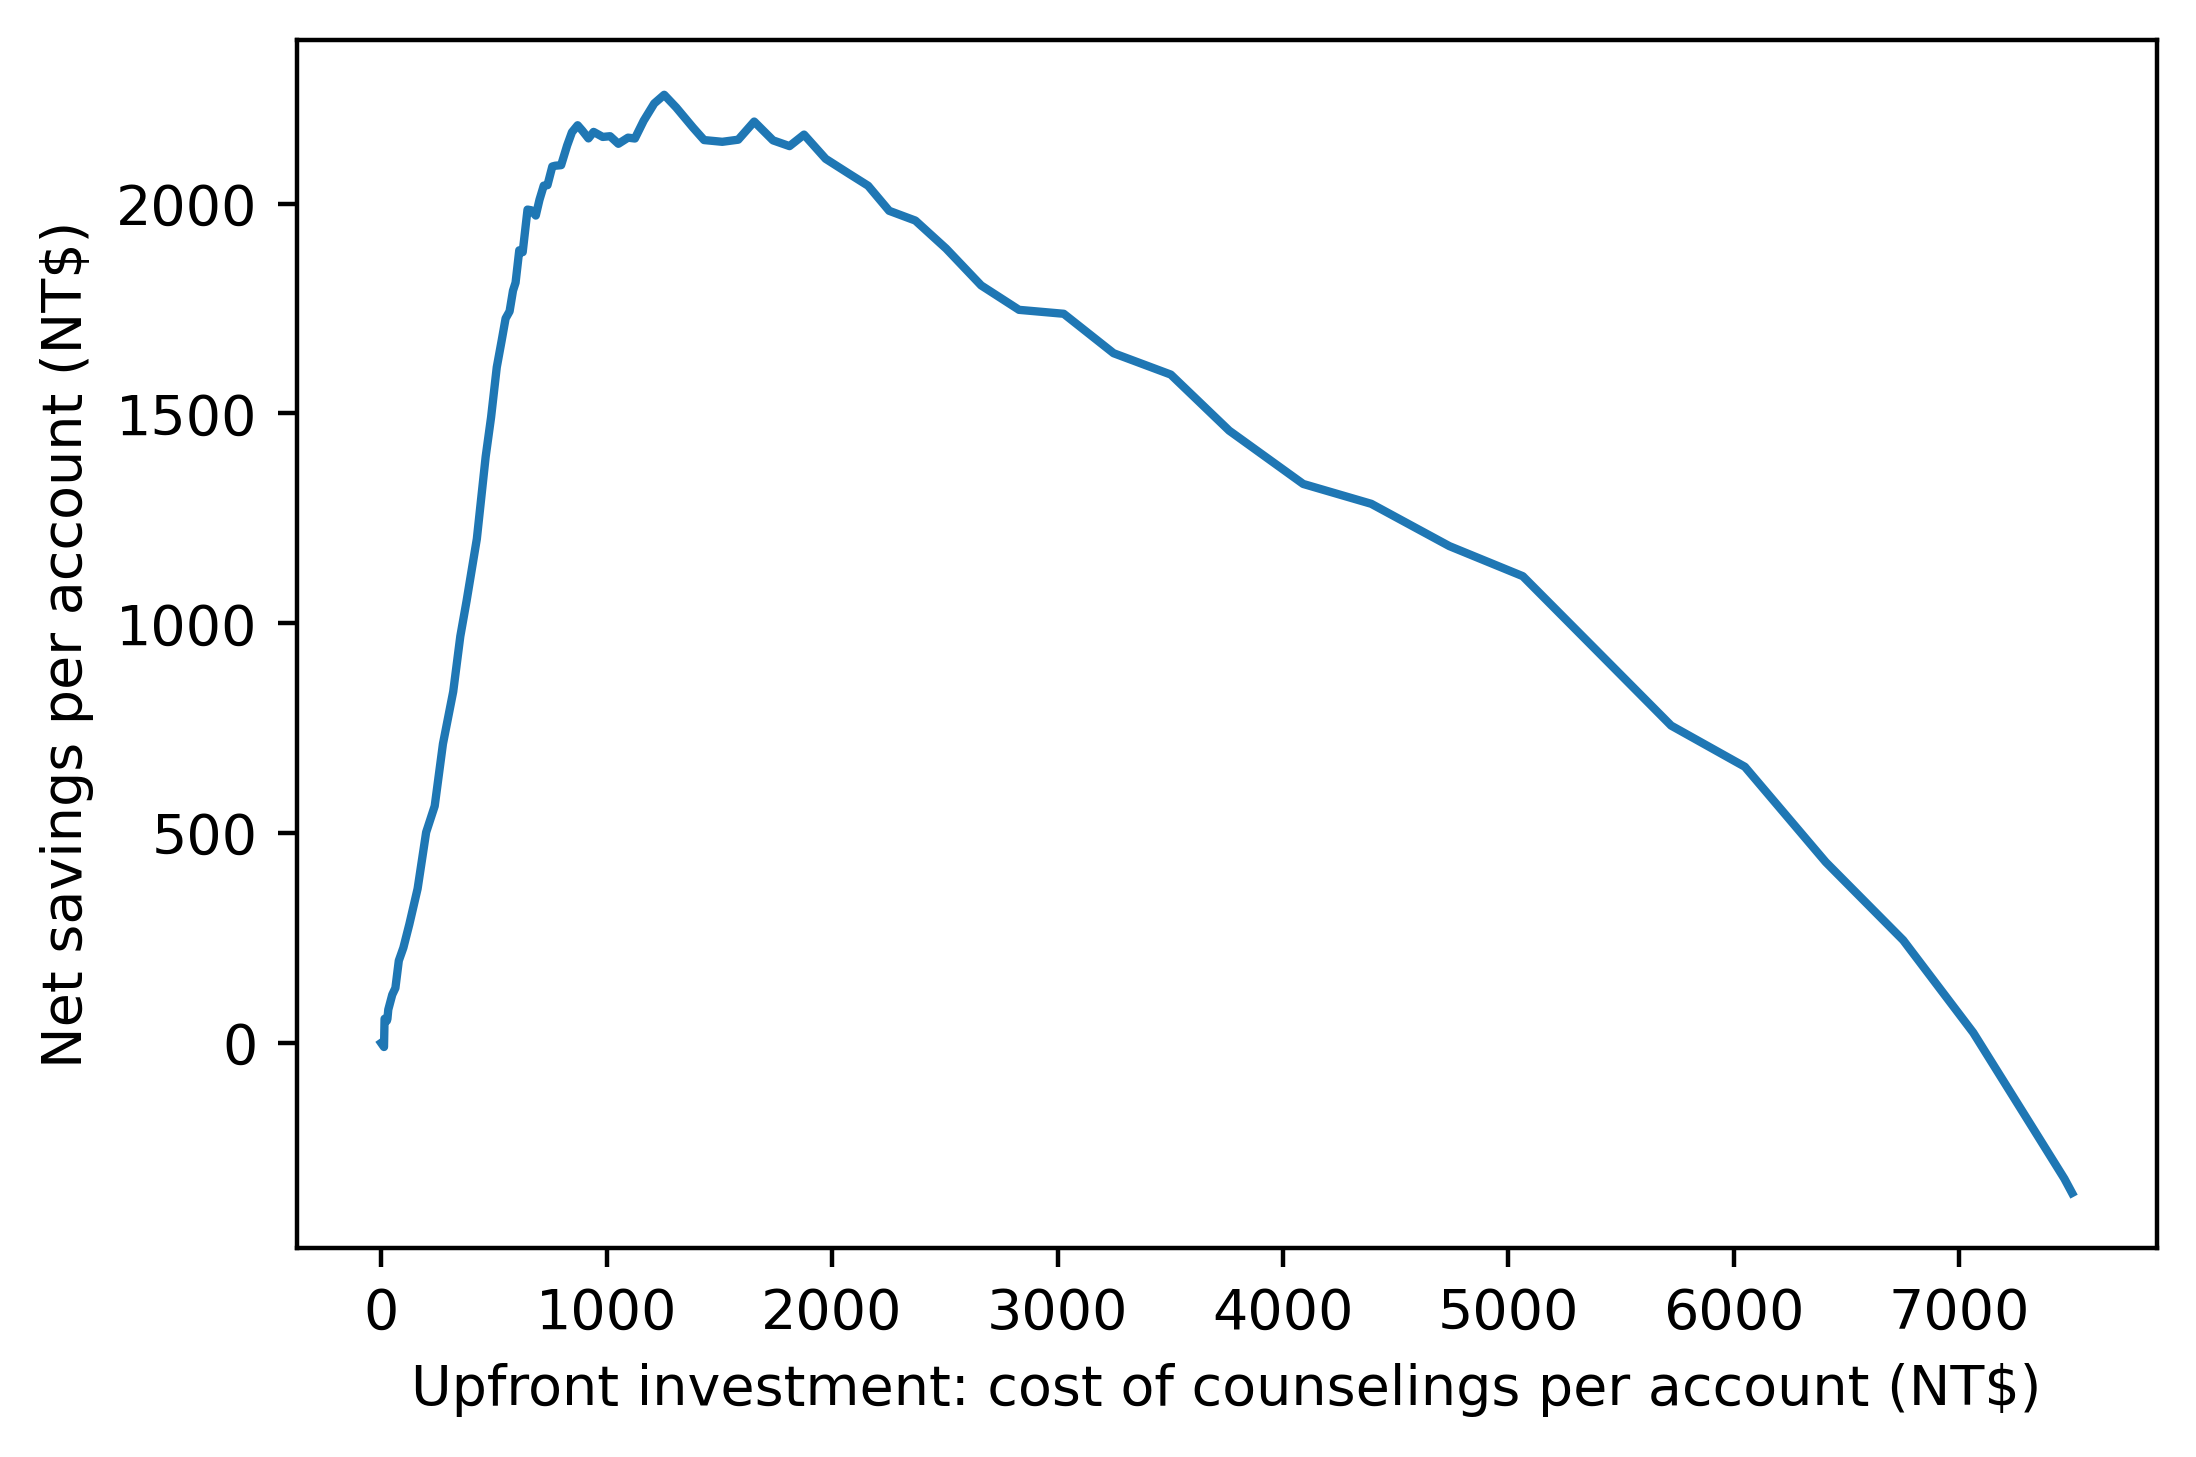

In [16]:
plt.plot(total_cost/len(y_test_all),
         net_savings/len(y_test_all))
plt.xlabel('Upfront investment: cost of counselings per account (NT$)')
plt.ylabel('Net savings per account (NT$)')

Text(0.5, 0, 'Threshold')

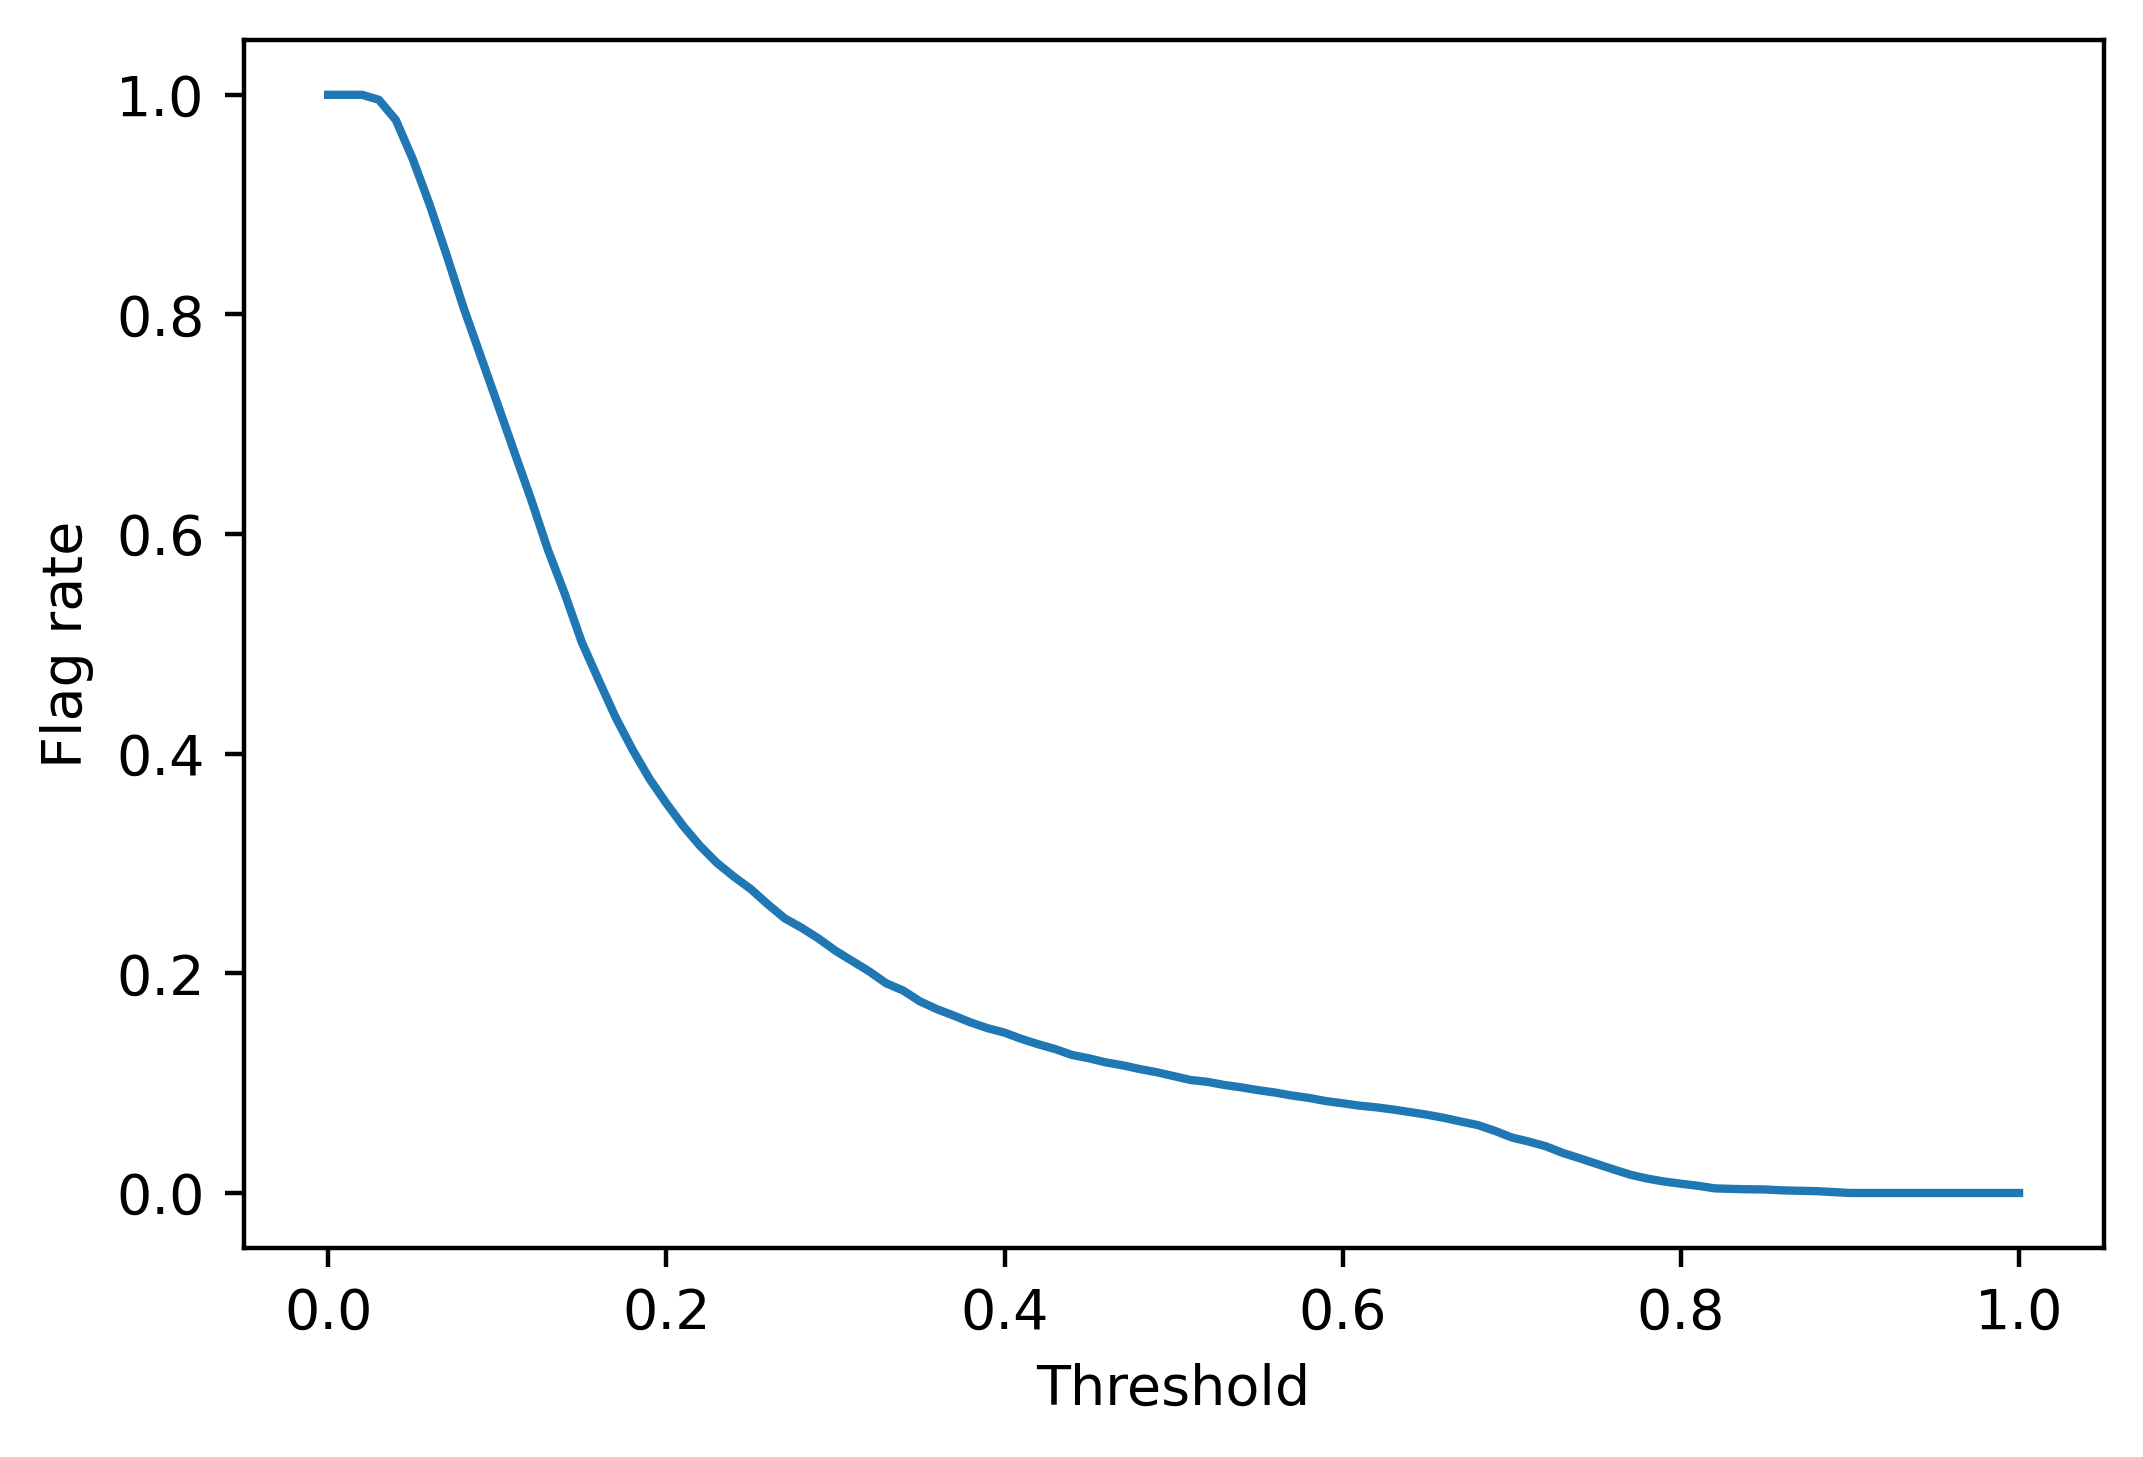

In [17]:
plt.plot(thresholds, n_pos_pred/len(y_test_all))
plt.ylabel('Flag rate')
plt.xlabel('Threshold')

invalid value encountered in true_divide


Text(0, 0.5, 'Precision')

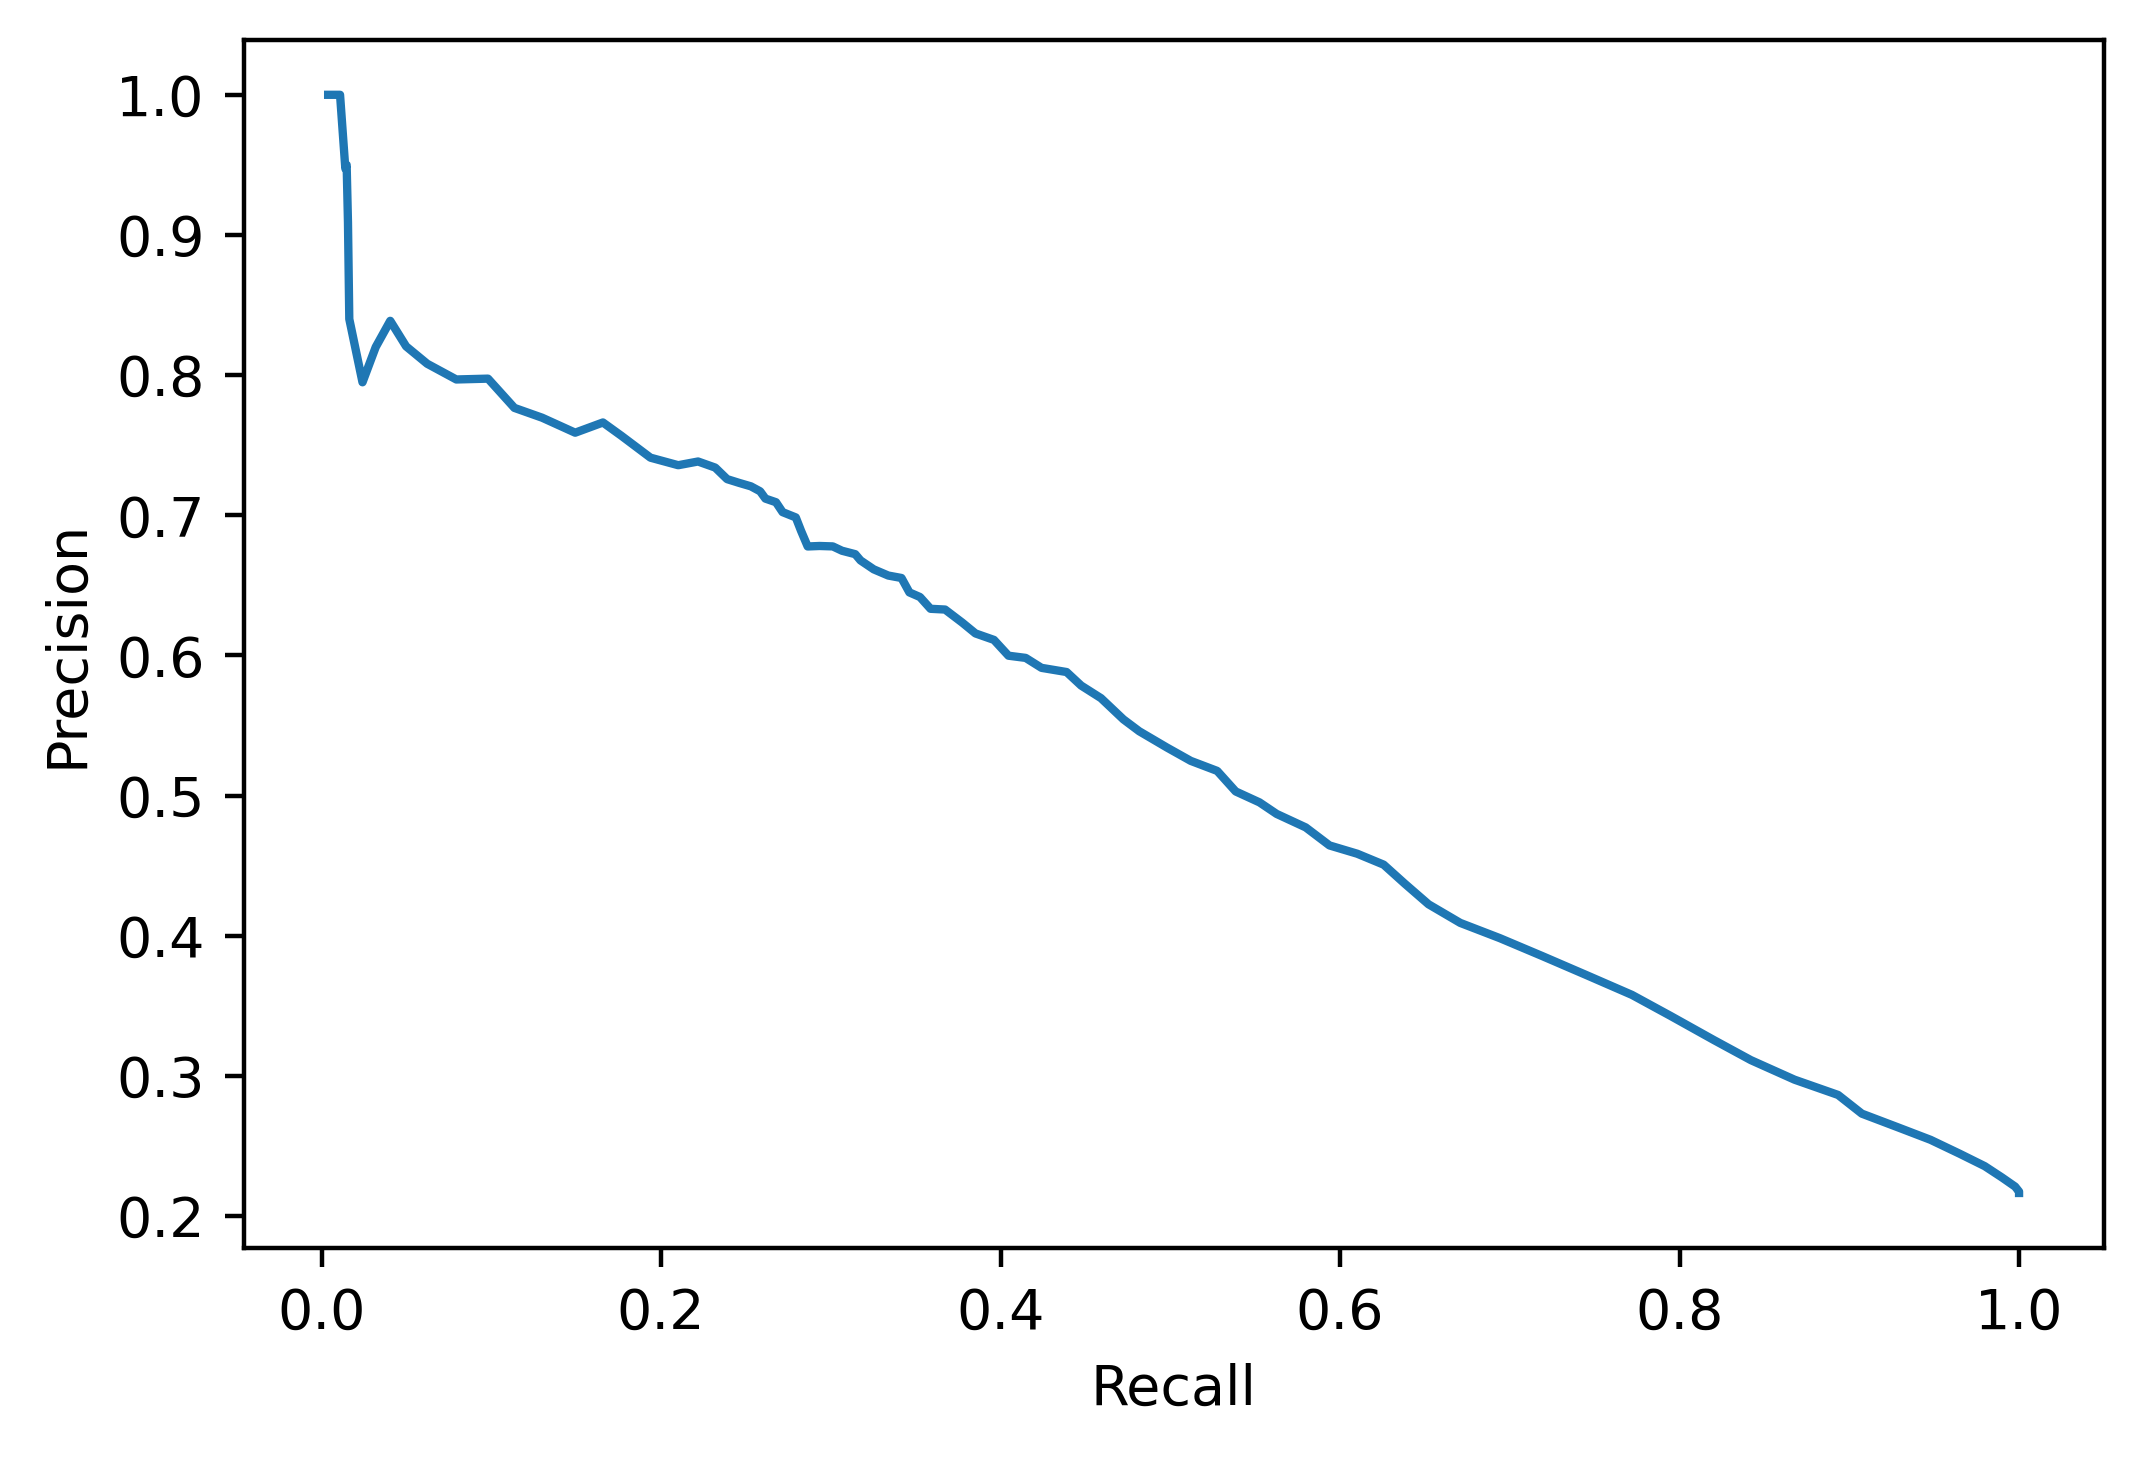

In [18]:
plt.plot(n_true_pos/sum(y_test_all),
         np.divide(n_true_pos, n_pos_pred))
plt.xlabel('Recall')
plt.ylabel('Precision')

invalid value encountered in true_divide


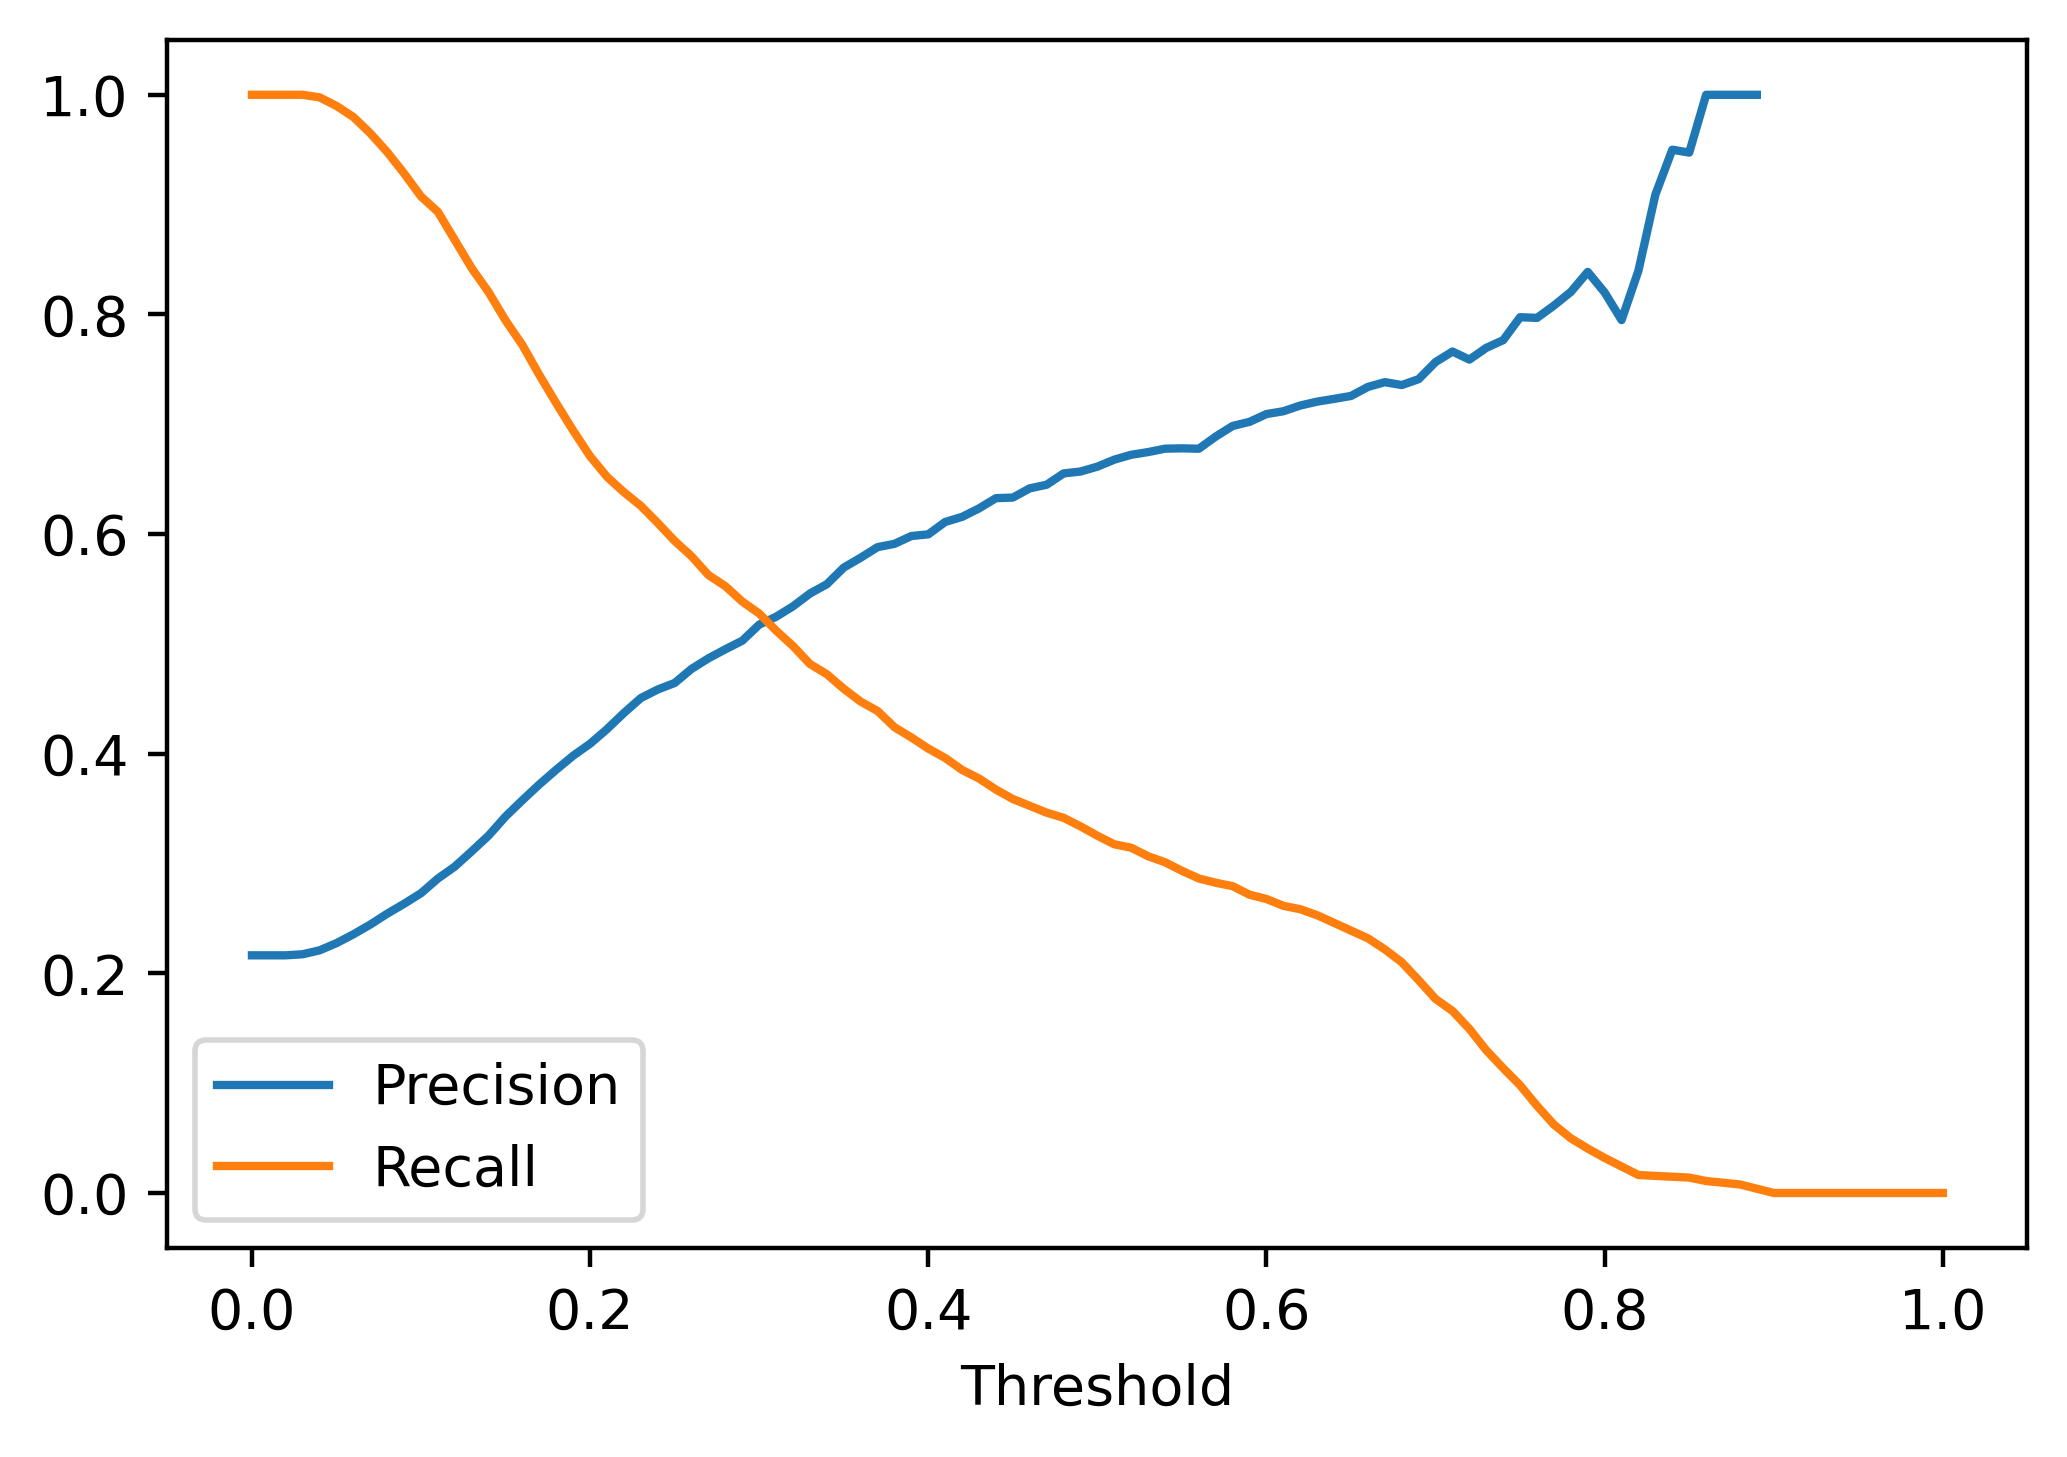

In [19]:
plt.plot(thresholds, np.divide(n_true_pos, n_pos_pred),
         label='Precision')
plt.plot(thresholds, n_true_pos/sum(y_test_all),
         label='Recall')
plt.xlabel('Threshold')
plt.legend()